<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <H1 index = "h1"><b>World Happiness Report</b></H1>
<h2><b>Context</b></h2><h3 style = "line-height:1.3;">
This notebook deals with the exploratory data analysis of the <a href = "https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021" style="color:#cc5200;">World Happiness Report</a> and <a href = "https://www.kaggle.com/rsrishav/world-population" style="color:#cc5200;">World Population</a>. Geographic data is also mapped with these data points such as <a href = "https://www.kaggle.com/andradaolteanu/country-mapping-iso-continent-region" style="color:#cc5200;">Region & Sub-region</a>, <a href = "https://www.kaggle.com/paultimothymooney/latitude-and-longitude-for-every-country-and-state" style="color:#cc5200;">Latitude & Longitude</a> to identify and visualize more patterns with the happiness index.</h3>


<h2><b>Content</b></h2>
    <h3 style = "line-height:1.3;">
The happiness scores and rankings use data from the Gallup World Poll. The columns such as the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia.</h3>
</div>


In [1]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
plt.style.use('seaborn-notebook')

In [2]:
# Loading the input files into dataframes
df_2021 = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv')
df = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report.csv')

<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;"><H1 index = "h2"><b>Data Analysis :-</b></H1></div>

<div style="color:#140033;
           display:fill;
           border-radius:75px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;"><i>world-happiness-report:-</i></div>

In [3]:
df.rename(columns={"Country name": "country"}, inplace= True)
df.info(show_counts = False)
df.head()
df.describe().T.style.bar(subset=['mean','std','min','25%','50%','75%','max'], color='#20c8f2')\
                      .background_gradient(subset=['mean','std','min','25%','50%','75%','max'], cmap='YlGn')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   country                           object 
 1   year                              int64  
 2   Life Ladder                       float64
 3   Log GDP per capita                float64
 4   Social support                    float64
 5   Healthy life expectancy at birth  float64
 6   Freedom to make life choices      float64
 7   Generosity                        float64
 8   Perceptions of corruption         float64
 9   Positive affect                   float64
 10  Negative affect                   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


,count,mean,std,min,25%,50%,75%,max
year,1949.000000,2013.216008,4.166828,2005.000000,2010.000000,2013.000000,2017.000000,2020.000000
Life Ladder,1949.000000,5.466705,1.115711,2.375000,4.640000,5.386000,6.283000,8.019000
Log GDP per capita,1913.000000,9.368453,1.154084,6.635000,8.464000,9.460000,10.353000,11.648000
Social support,1936.000000,0.812552,0.118482,0.290000,0.749750,0.835500,0.905000,0.987000
Healthy life expectancy at birth,1894.000000,63.359374,7.510245,32.300000,58.685000,65.200000,68.590000,77.100000
Freedom to make life choices,1917.000000,0.742558,0.142093,0.258000,0.647000,0.763000,0.856000,0.985000
Generosity,1860.000000,0.000103,0.162215,-0.335000,-0.113000,-0.025500,0.091000,0.698000
Perceptions of corruption,1839.000000,0.747125,0.186789,0.035000,0.690000,0.802000,0.872000,0.983000
Positive affect,1927.000000,0.710003,0.107100,0.322000,0.625500,0.722000,0.799000,0.944000
Negative affect,1933.000000,0.268544,0.085168,0.083000,0.206000,0.258000,0.320000,0.705000


<div style="color:#140033;
           display:fill;
           border-radius:75px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;"><i>world-happiness-report-2021:-</i></div>

In [4]:
df_2021.rename(columns={"Country name": "country"}, inplace= True)
df_2021.info(show_counts = False)
df_2021.head()
df_2021.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   country                                     object 
 1   Regional indicator                          object 
 2   Ladder score                                float64
 3   Standard error of ladder score              float64
 4   upperwhisker                                float64
 5   lowerwhisker                                float64
 6   Logged GDP per capita                       float64
 7   Social support                              float64
 8   Healthy life expectancy                     float64
 9   Freedom to make life choices                float64
 10  Generosity                                  float64
 11  Perceptions of corruption                   float64
 12  Ladder score in Dystopia                    float64
 13  Explained by: Log GDP per capita   

,country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,0.058752,0.022001,0.026,0.043,0.054,0.070,0.173
upperwhisker,149.0,5.648007,1.054330,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,5.417631,1.094879,2.449,4.706,5.413,6.128,7.780
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


<div style="color:#140033;
display:fill;
border-radius:15px;
border-style: solid;
border-width: 15px;
border-color:#f0e6ff;
background-color:#f0e6ff;
letter-spacing:0.75px;
font-family:'Futura';
line-height: 1.7em;
font-size:1.5em;">
<H1 index = "h3"><b>Introducing Population</b></H1>
<h3 style = "line-height:1.3;">
<ul>
<li>There is no population related data in the input data.</li><br>
<li>It is a no brainer to say that a country's happiness index relies on it's population greatly.</li><br>
<li>Adding the population information will be helpful in understanding the data correlations</li></ul></h3>
<hr>
<h3>Let's have a look at the population data</h3>
</div>

In [5]:
#Import population data into a dataframe
df_pop = pd.read_csv('../input/d/rsrishav/world-population/2021_population.csv')
df_pop.info(show_counts = False)
df_pop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   iso_code           object
 1   country            object
 2   2021_last_updated  object
 3   2020_population    object
 4   area               object
 5   density_sq_km      object
 6   growth_rate        object
 7   world_%            object
 8   rank               int64 
dtypes: int64(1), object(8)
memory usage: 16.2+ KB


,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,443,892,578","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,392,511,820","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"332,785,245","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"276,171,532","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"224,913,239","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;"><h3 style = "line-height:1.3;">
    Let's convert the numerical values which are currently recorded as strings into integers as they are continuous and have a look at the statistics.</h3>
</div>

In [6]:
df_pop['2021_last_updated'] = df_pop['2021_last_updated'].apply(lambda x : int(str(x).replace(',','')))
df_pop['2020_population'] = df_pop['2020_population'].apply(lambda x : int(str(x).replace(',','')))
df_pop['density_sq_km'] = df_pop.density_sq_km.apply(lambda x : int(str(x).replace(',','')[:-6]))
df_pop['area'] = df_pop.area.apply(lambda x : int(str(x).replace(',','')[:-6]))
df_pop['growth_rate'] = df_pop.growth_rate.apply(lambda x : float(str(x)[:-2]))
df_pop['world_%'] = df_pop['world_%'].apply(lambda x : float(str(x)[:-2]))
df_pop.describe().T

,count,mean,std,min,25%,50%,75%,max
2021_last_updated,228.0,3.450655e+07,1.379536e+08,800.0,556960.250,5852667.5,2.208185e+07,1.443893e+09
2020_population,228.0,3.417852e+07,1.370800e+08,801.0,552126.250,5821272.0,2.201413e+07,1.439324e+09
area,228.0,5.962995e+05,1.782545e+06,1.0,4133.500,85235.5,4.467625e+05,1.709824e+07
density_sq_km,228.0,4.562193e+02,2.096330e+03,0.0,35.750,95.5,2.400000e+02,2.194600e+04
growth_rate,228.0,1.036842e+00,1.042089e+00,-1.2,0.275,0.9,1.800000e+00,4.400000e+00
world_%,228.0,4.070175e-01,1.748037e+00,0.0,0.000,0.0,2.250000e-01,1.830000e+01
rank,228.0,1.153114e+02,6.703254e+01,1.0,57.750,114.5,1.722500e+02,2.320000e+02


<div style="color:#140033;
   display:fill;
   border-radius:15px;
    border-style: solid;
   border-width: 15px;
    border-color:#f0e6ff;
   background-color:#f0e6ff;
   letter-spacing:0.75px;
    font-family:'Futura';
    line-height: 1.7em;
    font-size:1.5em;">
<h2>The below data joins will be very much efficient in enhancing the Data Analysis.</h2>
<h3 style = "line-height:1.3;">
<ul>
<li>Latitude and Longitude data to visualise the data points globally.</li>
<li>Contitent and sub contitent data to identify patterns related to specific regions.</li>
</ul>
</h3>
</div>

In [7]:
df_country = pd.read_csv('../input/latitude-and-longitude-for-every-country-and-state/world_country_and_usa_states_latitude_and_longitude_values.csv')
# Removing USA states columns, as we are dealing with the country data
df_country_iso = pd.read_csv('../input/country-mapping-iso-continent-region/continents2.csv').rename(columns={"alpha-2": "country_code","alpha-3":"iso_code"})
df_country = df_country.merge(df_country_iso,on = 'country_code')[['iso_code','latitude','longitude']]
df_continent = pd.read_csv('../input/country-mapping-iso-continent-region/continents2.csv')
df_continent.rename(columns = {'alpha-3':'iso_code'}, inplace = True)
df_pop = df_pop.merge(df_country, on = 'iso_code')
df_pop = df_pop.merge(df_continent[['iso_code','region','sub-region']], on = 'iso_code')
df_pop.drop(columns = ['2020_population'], inplace= True)
df_pop.rename(columns = {'2021_last_updated':'population'}, inplace= True)
df_pop.head()
df_pop.describe().T.style.bar(color='#20c8f2')\
                      .background_gradient(subset=['mean','std','min','25%','50%','75%','max'], cmap='YlGn')
del df_country
del df_country_iso
del df_continent

,iso_code,country,population,area,density_sq_km,growth_rate,world_%,rank,latitude,longitude,region,sub-region
0,CHN,China,1443892578,9706961,149,0.3,18.3,1,35.861660,104.195397,Asia,Eastern Asia
1,IND,India,1392511820,3287590,424,0.9,17.6,2,20.593684,78.962880,Asia,Southern Asia
2,USA,United States,332785245,9372610,36,0.5,4.2,3,37.090240,-95.712891,Americas,Northern America
3,IDN,Indonesia,276171532,1904569,145,1.0,3.5,4,-0.789275,113.921327,Asia,South-eastern Asia
4,PAK,Pakistan,224913239,881912,255,1.9,2.8,5,30.375321,69.345116,Asia,Southern Asia


,count,mean,std,min,25%,50%,75%,max
population,222.000000,35382726.481982,139707164.811851,800.000000,615204.000000,6314259.000000,24764632.750000,1443892578.000000
area,222.000000,609610.256757,1804307.135692,1.000000,6882.500000,88851.500000,447187.500000,17098242.000000
density_sq_km,222.000000,453.968468,2123.569377,0.000000,35.250000,94.000000,231.250000,21946.000000
growth_rate,222.000000,1.039640,1.052838,-1.200000,0.200000,0.900000,1.800000,4.400000
world_%,222.000000,0.417568,1.770397,0.000000,0.000000,0.000000,0.300000,18.300000
rank,222.000000,113.527027,66.556999,1.000000,56.250000,112.500000,169.750000,232.000000
latitude,222.000000,18.490709,24.376210,-51.796253,3.992100,17.464257,39.048086,71.706936
longitude,222.000000,13.140230,74.630380,-177.156097,-37.956527,18.182149,47.553137,179.414413


In [8]:
#finding out the miss matched country names.
c1 = df_pop.country.value_counts().index
c2 = df.country.value_counts().index
# uncommon country codes
c1_minus_c2 = list(set(c1) - set(c2))
c1_minus_c2.sort()
c2_minus_c1 = list(set(c2) - set(c1))
c2_minus_c1.sort()
print(c1_minus_c2)
print(c2_minus_c1)

['American Samoa', 'Andorra', 'Anguilla', 'Antigua And Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Bermuda', 'Bosnia And Herzegovina', 'Brunei', 'Cape Verde', 'Cayman Islands', 'Cook Islands', 'Dominica', 'Dr Congo', 'Equatorial Guinea', 'Eritrea', 'Falkland Islands', 'Faroe Islands', 'Fiji', 'French Polynesia', 'Gibraltar', 'Greenland', 'Grenada', 'Guam', 'Guinea Bissau', 'Hong Kong', 'Isle Of Man', 'Kiribati', 'Liechtenstein', 'Macau', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia', 'Monaco', 'Montserrat', 'Nauru', 'New Caledonia', 'Niue', 'North Korea', 'Northern Mariana Islands', 'Palau', 'Palestine', 'Papua New Guinea', 'Puerto Rico', 'Republic Of The Congo', 'Saint Kitts And Nevis', 'Saint Lucia', 'Saint Pierre And Miquelon', 'Saint Vincent And The Grenadines', 'Samoa', 'San Marino', 'Sao Tome And Principe', 'Seychelles', 'Solomon Islands', 'Taiwan', 'Timor Leste', 'Tokelau', 'Tonga', 'Trinidad And Tobago', 'Turks And Caicos Islands', 'Tuvalu', 'United States Virgin Isl

<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">
As we are trying to merge dataframes from two different  dataset. There will be a mismatch in the keys. Let's try to map some of the keys by replacing the uncommon key values. Here the <b>Country</b> column acts as a key.
    </h3>
</div>

In [9]:
old_values = ['Congo (Brazzaville)', 'Congo (Kinshasa)', 'Hong Kong S.A.R. of China', 'North Cyprus', 'Palestinian Territories', 'Somaliland region', 'Taiwan Province of China', 'Trinidad and Tobago']
new_values = ['Republic Of The Congo', 'Dr Congo', 'Hong Kong', 'Cyprus', 'Palestine', 'Somalia', 'Taiwan', 'Trinidad And Tobago']
df['country'] = df['country'].replace(old_values,new_values)
df_2021['country'] = df_2021['country'].replace(old_values,new_values)

<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3>Let's have a look at our final data</h3>
</div>

In [10]:
df = df.merge(df_pop,how = 'inner',on='country')
df_2021 = df_2021.merge(df_pop,how = 'inner',on='country')
df.sort_values(by = 'year', inplace = True)
df.info(show_counts = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1915 entries, 205 to 1914
Data columns (total 22 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   country                           object 
 1   year                              int64  
 2   Life Ladder                       float64
 3   Log GDP per capita                float64
 4   Social support                    float64
 5   Healthy life expectancy at birth  float64
 6   Freedom to make life choices      float64
 7   Generosity                        float64
 8   Perceptions of corruption         float64
 9   Positive affect                   float64
 10  Negative affect                   float64
 11  iso_code                          object 
 12  population                        int64  
 13  area                              int64  
 14  density_sq_km                     int64  
 15  growth_rate                       float64
 16  world_%                           float6

<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h2>Distribution of <b>Generousity</b> data :-</h2>
</div>

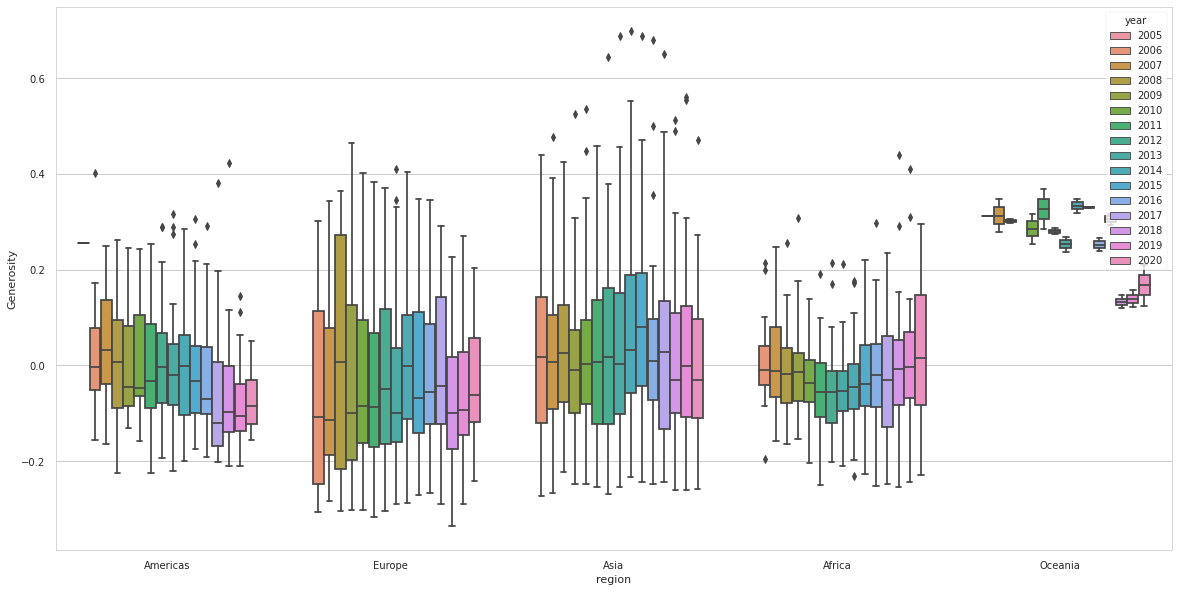

In [11]:
fig,ax = plt.subplots(figsize = (20,10))
g = sns.boxplot(data = df,x = 'region', y = 'Generosity',hue='year', ax = ax)
#plt.savefig('Boxplot_of_merged_data.png')

<div style="color:#00381c;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 5px;
            border-color:#00381c;
           background-color:#b8fcda;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">The above plot clearly infers the generousity index got dropped significantly over the span of 15 years in the region <b>Americas</b></h3>
</div>

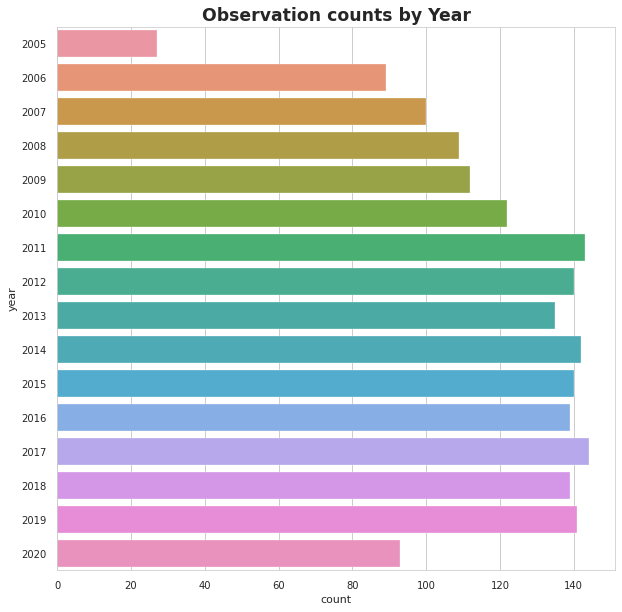

In [12]:
year_wise_cnt = df.year.value_counts()
fig, ax = plt.subplots(figsize = (10,10))
plt.title('Observation counts by Year',fontsize = 'xx-large',weight = 'bold');
sns.countplot(data = df,y ='year',ax = ax);

<div style="color:#00381c;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 5px;
            border-color:#00381c;
           background-color:#b8fcda;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">
The observations from the year 2005 are comparitively very less and generousity value is missing for most of the rows. Data standardisation is needs to be done by filling up the missing values with proper replacements.
    </h3>
</div>

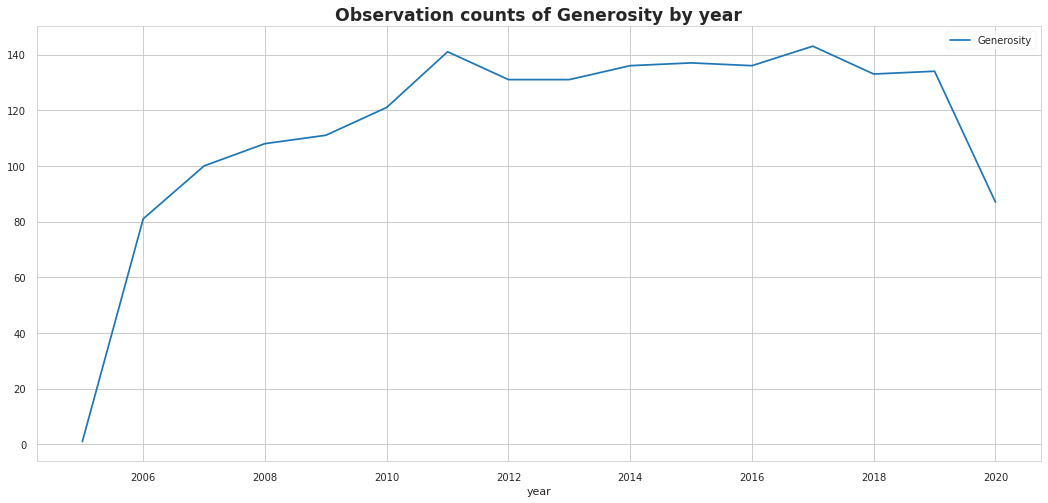

In [13]:
df.groupby('year')[['Generosity']].count().plot(figsize = (18,8));
plt.title('Observation counts of Generosity by year',fontsize = 'xx-large',weight = 'bold');

<div style="color:#00381c;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 5px;
            border-color:#00381c;
           background-color:#b8fcda;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">The generousity index is tremendous in the year <b>2005</b> when compared with other years. However, The observations are very less in 2005.</h3></div>
    
*** 
<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h1 index = "h4"><b>Handling missing values</b></h1>
<h3> Missing value counts in each columns</h3>
    </div>

In [14]:
df.isnull().sum()

country                               0
year                                  0
Life Ladder                           0
Log GDP per capita                   31
Social support                       13
Healthy life expectancy at birth     41
Freedom to make life choices         31
Generosity                           84
Perceptions of corruption           110
Positive affect                      21
Negative affect                      16
iso_code                              0
population                            0
area                                  0
density_sq_km                         0
growth_rate                           0
world_%                               0
rank                                  0
latitude                              0
longitude                             0
region                                0
sub-region                            0
dtype: int64

<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;"><h3 style = "line-height:1.3;">
    Let's try to fill in Generosity values based on the other observations from its country/region data</h3></div>

In [15]:
col_null_vals = df.isnull().sum()[df.isnull().sum() > 0].index

In [16]:
for x in col_null_vals:
    df[x]= df.groupby('country')[x].transform(lambda grp: grp.fillna(np.mean(grp)))
    df[x] = df.groupby('region')[x].transform(lambda grp: grp.fillna(np.mean(grp)))

In [17]:
df.isnull().sum()

country                             0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
iso_code                            0
population                          0
area                                0
density_sq_km                       0
growth_rate                         0
world_%                             0
rank                                0
latitude                            0
longitude                           0
region                              0
sub-region                          0
dtype: int64

<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3>We have now filled in all the null values with its respective mean.</h3>
    
***

<h3>How does each and every variables are correlated?</h3>
</div>

Text(0.5, 1.0, 'Heatmap of data correlations between the columns')

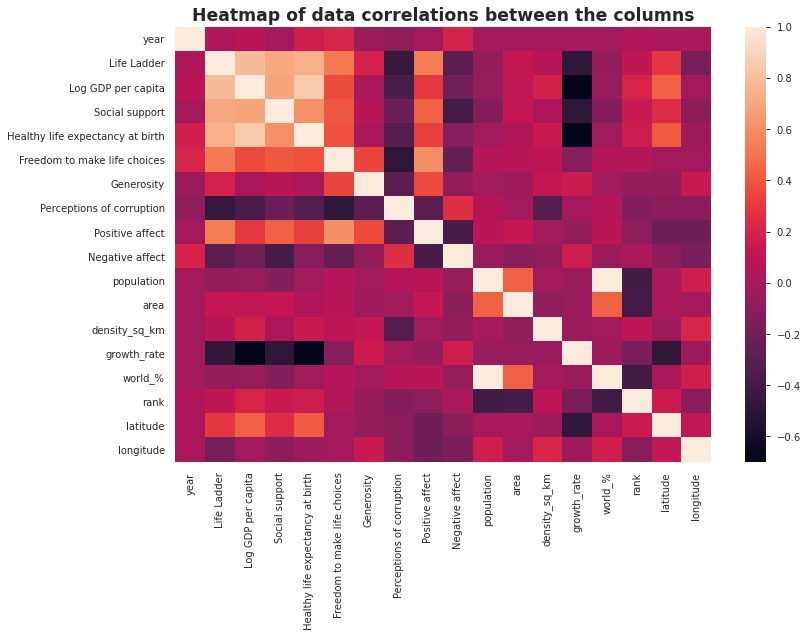

In [18]:
ax,fig = plt.subplots(figsize = (12,8))
g = sns.heatmap(df.corr())
plt.title('Heatmap of data correlations between the columns',fontsize = 'xx-large',weight = 'bold');
plt.savefig('Correlations_Heatmap.png')

<div style="color:#00381c;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 5px;
            border-color:#00381c;
           background-color:#b8fcda;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">It is seen that there are much correlations between multiple columns of the dataframe. Notably we can see the correlations between growth rate and the columns of the original dataset, adding to the assumption that population related data will be helpful in identifying the patterns in origanl dataset
</h3><div>

Text(0.5, 0.98, 'Pairplot between the columns with high correlations')

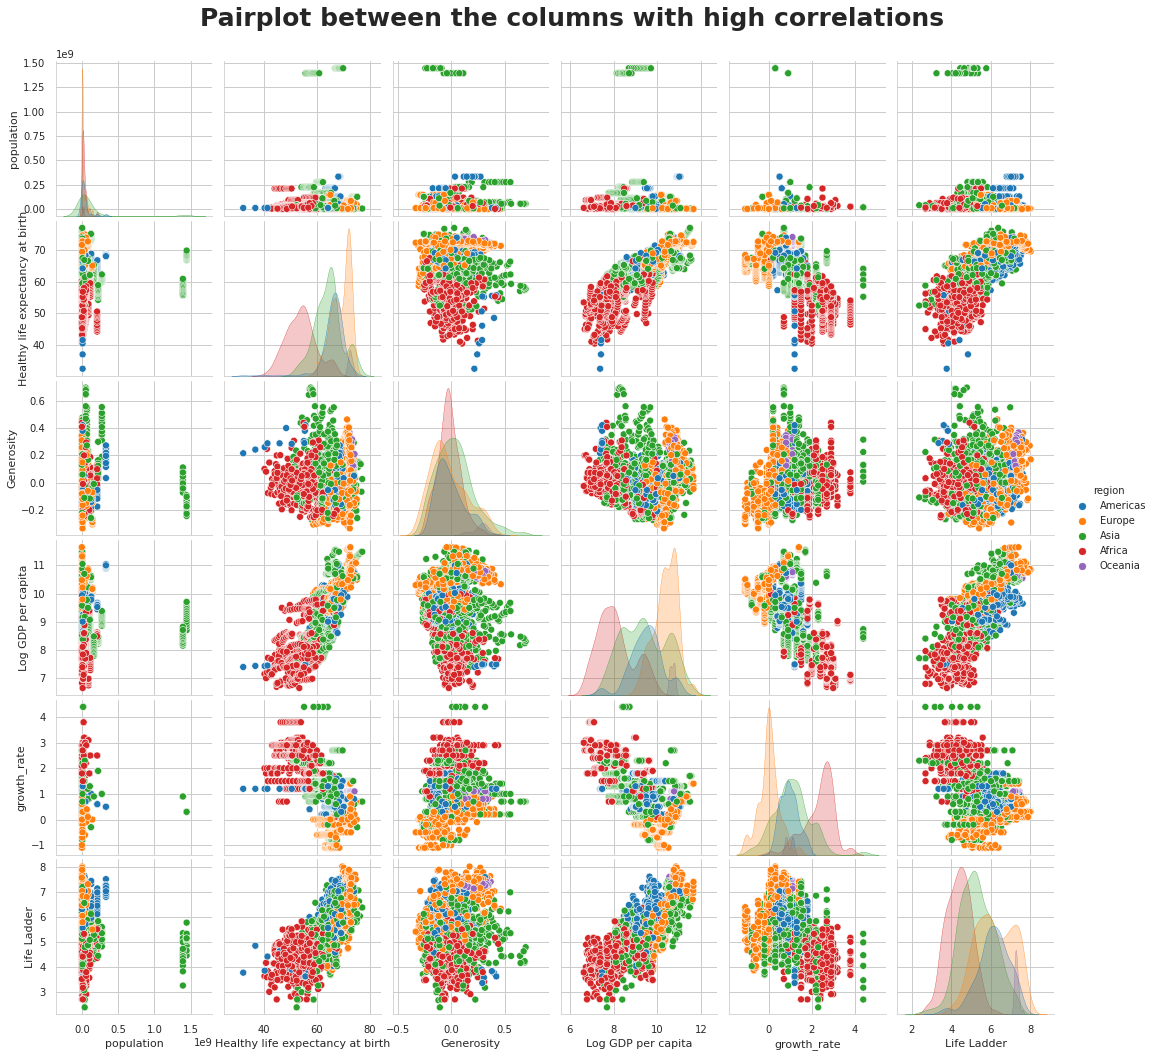

In [19]:
df_pairplot = df[['population','Healthy life expectancy at birth','Generosity', 'Log GDP per capita','growth_rate','Life Ladder','region','sub-region']]
pair_plot = sns.pairplot(data = df_pairplot,hue='region');
plt.subplots_adjust(top=0.93)
pair_plot.fig.suptitle(t = "Pairplot between the columns with high correlations",fontsize = 25,weight = 'bold');
pair_plot.savefig('Pairplot.png')

<div style="color:#00381c;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 5px;
            border-color:#00381c;
           background-color:#b8fcda;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
<h3 style = "line-height:1.3;"><b>Inferences from the above plot:-</b>
<ul>
<li>It is seen that the region (continent) plays a significant role in defining the happiness index of a country overall. The datapoints from each region are clustered together in the same region.</li><br>
<li>We can see clear clusters in the diagonals representing continent data which signifies that a countries happiness index depends on which part of region it belongs to.</li><br>
<li>The features <i>Healthy life expectancy at birth, Log GDP per capita and Life Ladder are interrelated to each other</i></li><br>
    <li><i>Growth rate</i> plays a pivotal role for the countries in setting it's <i>GDP per capita</i>. There is a decline in GDP per capita with increase in Growth rate</li>
</ul>
</h3>
</div>

In [20]:
select_cols_df = ['country','population','Healthy life expectancy at birth','Generosity','Life Ladder', 'Log GDP per capita','growth_rate','Perceptions of corruption','region','sub-region']
select_cols_df_2021 = ['country','population','Healthy life expectancy','Generosity','Ladder score','Logged GDP per capita','growth_rate','Perceptions of corruption','region','sub-region']
df.groupby('year').country.count()

year
2005     27
2006     89
2007    100
2008    109
2009    112
2010    122
2011    143
2012    140
2013    135
2014    142
2015    140
2016    139
2017    144
2018    139
2019    141
2020     93
Name: country, dtype: int64

In [21]:
df_good = df_2021.groupby('country')['Ladder score'].mean().sort_values(ascending=False)[:10].reset_index().merge(df_2021[['country','region']], on = 'country')
df_poor = df_2021.groupby('country')['Ladder score'].mean().sort_values(ascending=True)[:10].reset_index().merge(df_2021[['country','region']], on = 'country')

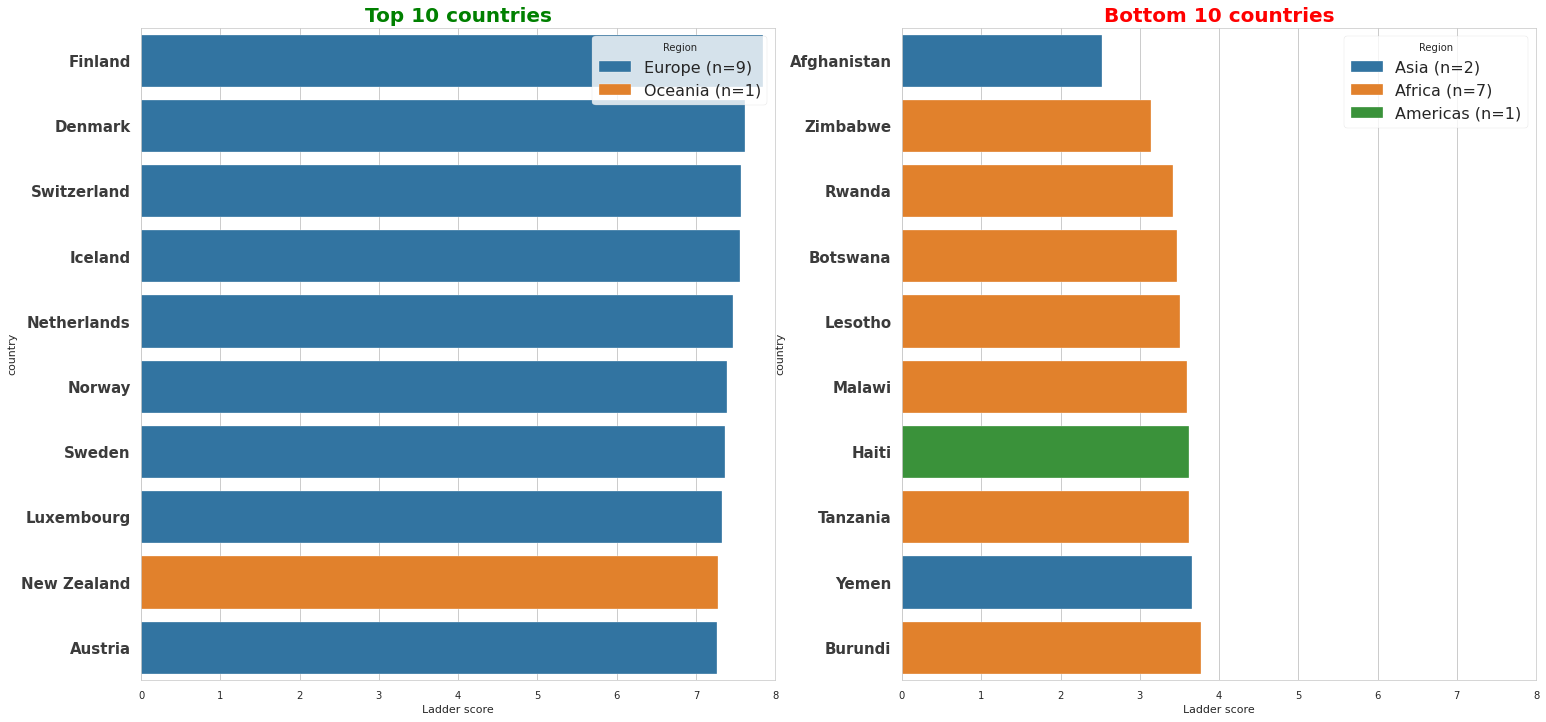

In [22]:
fig, ax = plt.subplots(1,2, figsize = (25,12))
top_plot = sns.barplot(data = df_good,x ='Ladder score', y = 'country', hue = 'region', ax = ax[0], dodge=False);
top_plot.set(xlim = (0,8));
top_plot.set_yticklabels(df_good.country,fontdict={'fontsize': 15,'fontweight' : 'bold'}, alpha=0.9)
top_plot.set_title(label = 'Top 10 countries', color = 'green',fontdict = {'fontsize': 20,'fontweight' : 'bold'});
h, l = top_plot.get_legend_handles_labels();
counts = df_good.region.value_counts().reindex(l);
l = [f'{yn} (n={c})' for yn,c in counts.iteritems()]
top_plot.legend(h,l, title="Region",prop={'size': 16});
bottom_plot = sns.barplot(data = df_poor,x ='Ladder score', y = 'country', hue = 'region', ax = ax[1], dodge=False);
bottom_plot.set(xlim = (0,8));
bottom_plot.set_yticklabels(df_poor.country,fontdict={'fontsize': 15,'fontweight' : 'bold'}, alpha=0.9)
h, l = bottom_plot.get_legend_handles_labels();
counts = df_poor.region.value_counts().reindex(l);
l = [f'{yn} (n={c})' for yn,c in counts.iteritems()]
bottom_plot.legend(h,l, title="Region",prop={'size': 16});
bottom_plot.set_title(label = 'Bottom 10 countries', color = 'red',fontdict = {'fontsize': 20,'fontweight' : 'bold'});

<div style="color:#00381c;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 5px;
            border-color:#00381c;
           background-color:#b8fcda;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">It is seen that out of the top 10 countries, 9 are Europian countries and out of the bottom 10 countries, 7 are African countries</h3>
</div>

In [23]:
fig1 = px.choropleth(df, 
                    locations="iso_code",
                    color='Life Ladder', 
                    hover_name='Life Ladder',
                    hover_data =select_cols_df,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    animation_frame="year"
                   ).update_layout(
    title_text = 'World Happiness Index - year wise data',
    title_x = 0.5,);
iplot(fig1)

In [24]:
fig2 = px.choropleth(
    df_2021,
    locations="iso_code",
    color='Ladder score',
    hover_name='Ladder score',
    hover_data=select_cols_df_2021,
    animation_frame='region'
).update_layout(
    title_text = 'World Happiness map in 2021 - regions wise data',
    title_x = 0.5,)
iplot(fig2)